<a href="https://colab.research.google.com/github/charmi-devisetty/PRODIGY_DS_03/blob/main/prodigy_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report,accuracy_score,confusion_matrix,roc_curve,auc)


In [ ]:
df = pd.read_csv("/content/bank-additional.csv", sep=';')


In [ ]:
df_encoded = df.copy()
label_encoders = {}

for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]


In [ ]:
importances = sorted(zip(X.columns, clf.feature_importances_),key=lambda x: x[1],reverse=True)

print("\nTop Important Features:")
for feature, score in importances[:10]:
    print(f"{feature}: {score:.4f}")



Top Important Features:
duration: 0.3553
nr.employed: 0.1462
age: 0.0904
euribor3m: 0.0896
job: 0.0483
day_of_week: 0.0352
education: 0.0337
campaign: 0.0285
pdays: 0.0239
month: 0.0224


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

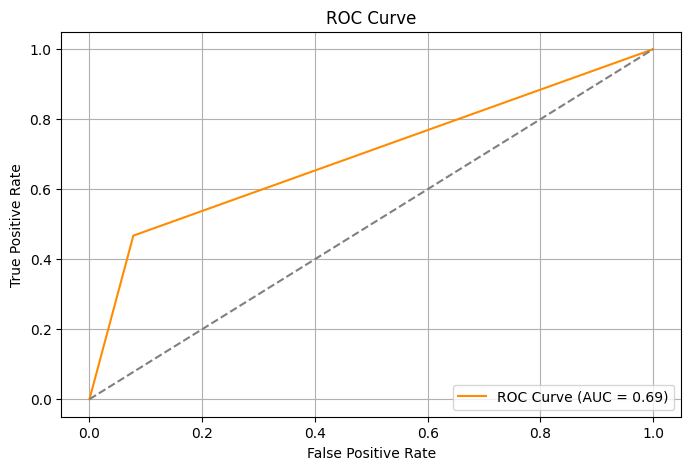

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

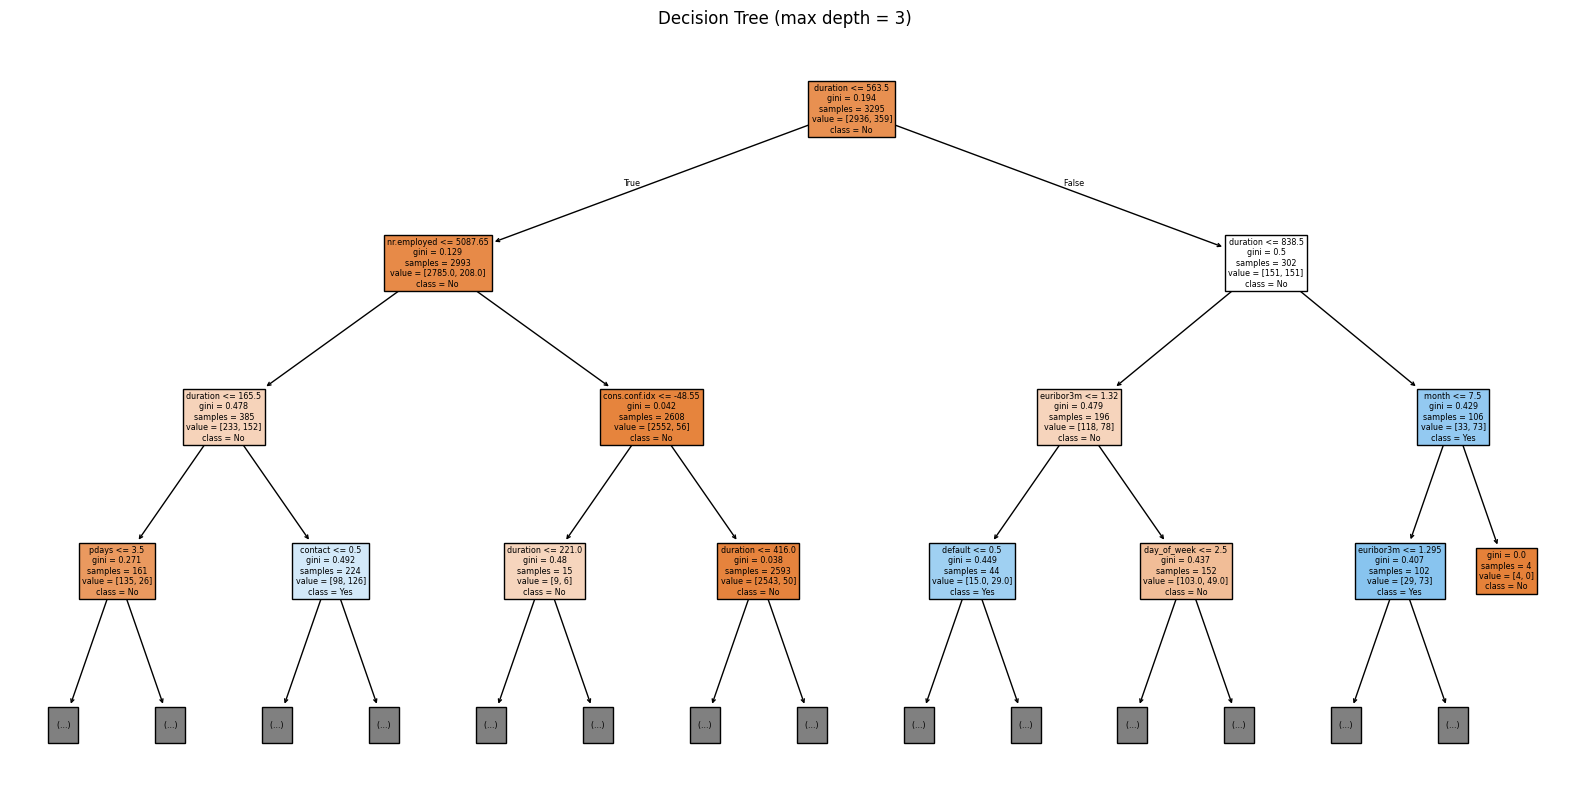

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("Decision Tree (max depth = 3)")
plt.show()